# **Análise exploratória dos microdados do ENEM 2022**
#
[Gráficos de distribuição dos dados](#graficos-de-distribuicao-dos-dados)

[Estatísticas descritivas](#estatisticas-descritivas)

[Correlação e encoding](#correlacao)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Carrega os dados do arquivo pré-processado
file_path = '../data/df_prep.csv'
df = pd.read_csv(file_path, sep=';', encoding='iso-8859-1')
df

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q033B_hab,Q033C_hab,Q033D_hab,Q033E_hab,Q033F_hab,Q033G_hab,Q033H_hab,Q033I_hab,Q033J_hab,Q034_hab
0,210056517269,17 anos,Feminino,Solteiro(a),Preta,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,Ensino Regular,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nada preparado(a).
1,210057083270,17 anos,Feminino,Solteiro(a),Preta,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Privada,Ensino Regular,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210057631375,18 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,2021,Não Respondeu,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,210055561481,25 anos,Masculino,Solteiro(a),Branca,Brasileiro(a),Já concluí o Ensino Médio,2015,Não Respondeu,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,210056676350,17 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,Ensino Regular,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,210057002817,18 anos,Masculino,Solteiro(a),Não declarado,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,Ensino Regular,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,210057767703,17 anos,Feminino,Solteiro(a),Branca,Brasileiro(a),Estou cursando e concluirei o Ensino Médio apó...,Não informado,Não Respondeu,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,210056569478,18 anos,Masculino,Solteiro(a),Branca,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,Ensino Regular,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49998,210055446081,19 anos,Feminino,Solteiro(a),Branca,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,Ensino Regular,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Gráficos de distribuição dos dados** <a id='graficos-de-distribuicao-dos-dados'></a>

### **Participantes por faixa etária**

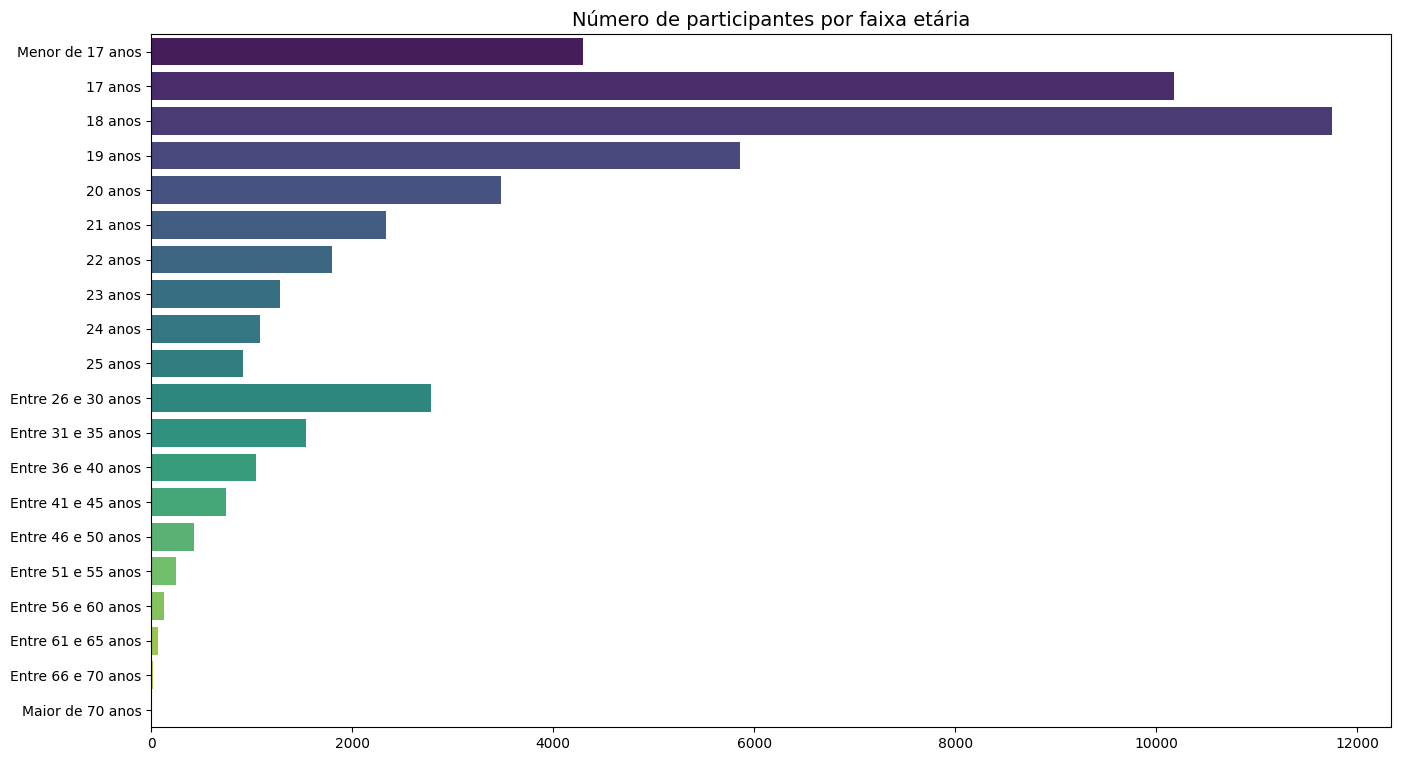

In [2]:
# Define a ordem das faixas etárias, colocando 'Menor de 17 anos' no início
ordem_idades = sorted(df['TP_FAIXA_ETARIA'].dropna().unique())
ordem_idades = ['Menor de 17 anos'] + [idade for idade in ordem_idades if idade != 'Menor de 17 anos']

# Obtém a contagem de participantes por faixa etária
idade_counts = df['TP_FAIXA_ETARIA'].value_counts().reindex(ordem_idades)

# Cria o gráfico
plt.figure(figsize=(16, 9))
sns.barplot(y=idade_counts.index.astype(str), x=idade_counts.values, palette='viridis')

# Define o título do gráfico
plt.title('Número de participantes por faixa etária', fontsize=14)
plt.xlabel('')
plt.ylabel('')

# Exibe o gráfico
plt.show()

Este gráfico de barras exibe a distribuição do número de participantes do ENEM 2022 por faixa etária.
#
+ **Maioria dos candidatos são jovens** – a grande concentração está entre 17 e 20 anos, com os picos em 17 e 18 anos. Isso faz sentido, pois a maioria dos estudantes faz o ENEM no ensino médio ou logo após concluí-lo.

+ **Número decrescente com a idade** – após os 20 anos, a participação cai progressivamente, com pequenas quantidades de candidatos acima de 30 anos.

+ **Participação adulta** – ainda há um número considerável de participantes entre 26 e 30 anos, sugerindo pessoas tentando novas oportunidades educacionais.

+ **Baixíssima participação de idosos** – faixas como 66 a 70 anos e maior de 70 anos praticamente não aparecem no gráfico, indicando que candidatos mais velhos são exceções.

### **Proporção de homens e mulheres**

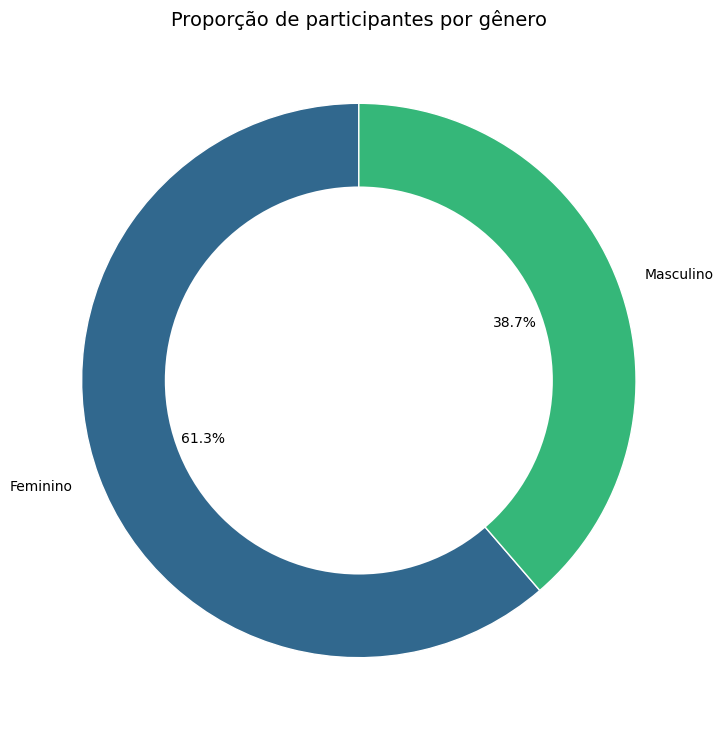

In [3]:
# Conta a quantidade de homens e mulheres
sexo_counts = df['TP_SEXO'].value_counts()

# Cores
cores = sns.color_palette('viridis', len(sexo_counts))

# Cria o gráfico de rosca
fig, ax = plt.subplots(figsize=(16, 9))
ax.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', startangle=90, colors=cores, wedgeprops={'edgecolor': 'white'})
ax.add_artist(plt.Circle((0, 0), 0.70, fc='white')) # Adiciona o espaço central para formar a rosca

# Define o título
plt.title('Proporção de participantes por gênero', fontsize=14)

# Exibe o gráfico
plt.show()

Este gráfico de rosca mostra a proporção de participantes do ENEM por gênero.
#
+ **Predominância de mulheres** – a maioria dos participantes é do gênero feminino (61,3%), o que é uma tendência comum em edições do ENEM, refletindo uma maior participação feminina na educação superior.

+ **Menor participação de homens** – candidatos do gênero masculino representam 38,7% dos inscritos, uma proporção bem menor comparada às mulheres.

+ **Distribuição equilibrada, mas desigual** – apesar de não ser um desequilíbrio extremo, há uma diferença notável entre os gêneros.

### **Participantes por etnia**

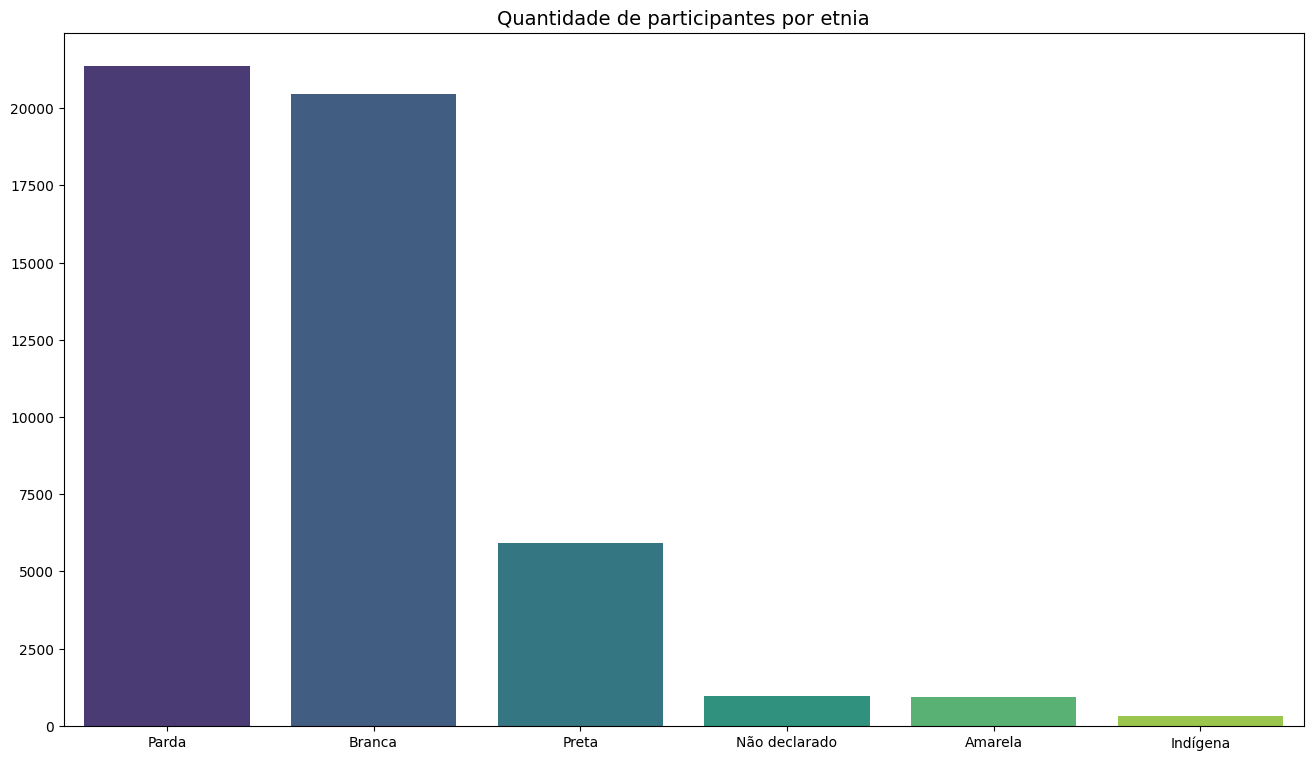

In [4]:
# Conta a quantidade de participantes por etnia
etnia_counts = df['TP_COR_RACA'].value_counts()

# Cores
cores = sns.color_palette('viridis', len(etnia_counts))

# Cria o gráfico de barras
plt.figure(figsize=(16, 9))
sns.barplot(x=etnia_counts.index, y=etnia_counts.values, palette=cores)

# Define título e remove rótulos dos eixos
plt.title('Quantidade de participantes por etnia', fontsize=14)
plt.xlabel('')
plt.ylabel('')

# Exibe o gráfico
plt.show()

A distribuição dos participantes por etnia reflete a demografia brasileira:
#
+ Pardos e brancos são a maioria, com números próximos.

+ Pretos têm participação menor, mas ainda significativa.

+ Amarelos e indígenas representam uma parcela bem reduzida.
#
A distribuição segue padrões do Censo, refletindo a composição racial do país.

### **Participantes por renda familiar**

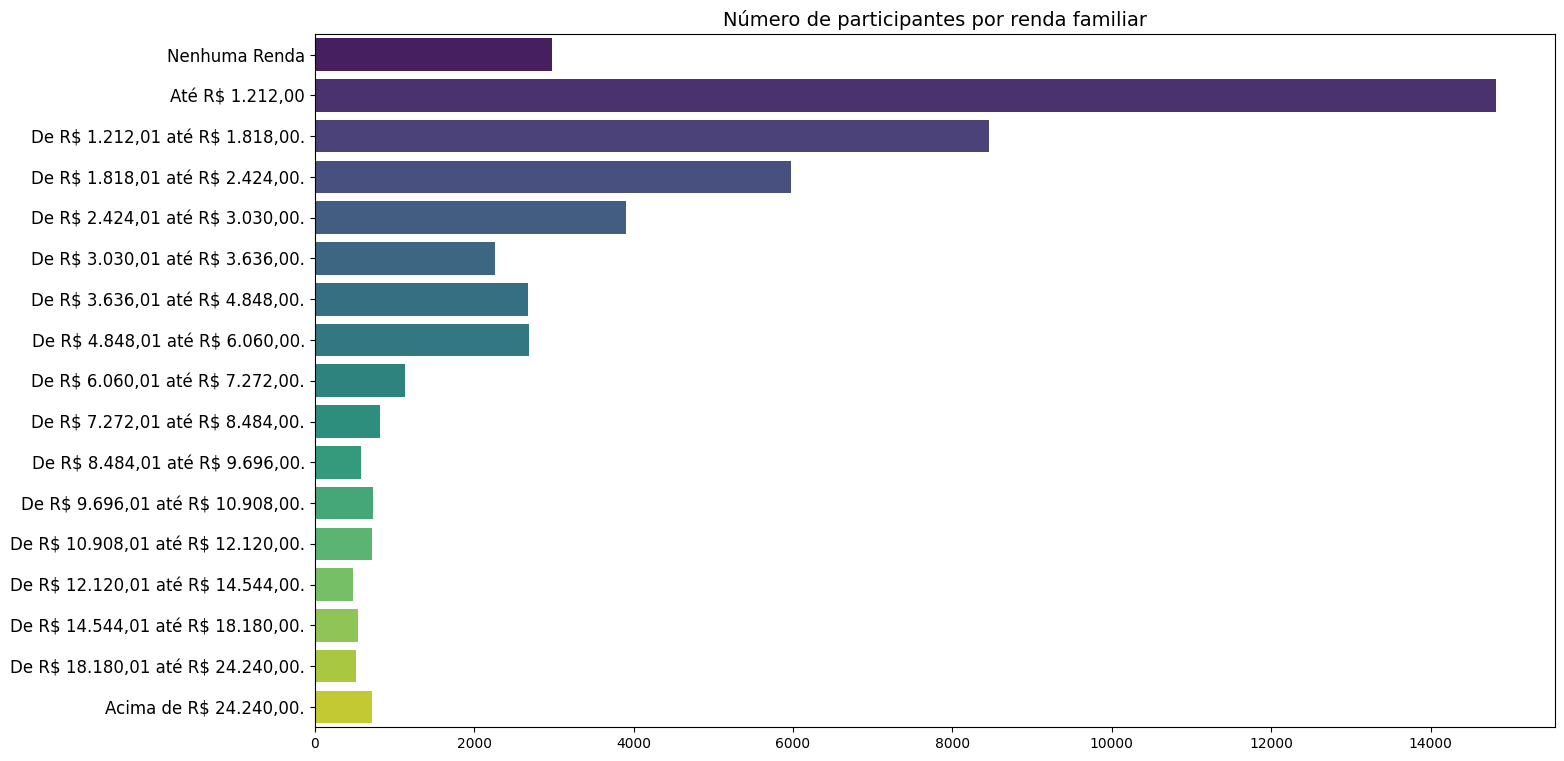

In [5]:
# Define a ordem correta das categorias de renda
ordem_renda_corrigida = [
    'Nenhuma Renda',
    'Até R$ 1.212,00',
    'De R$ 1.212,01 até R$ 1.818,00.',
    'De R$ 1.818,01 até R$ 2.424,00.',
    'De R$ 2.424,01 até R$ 3.030,00.',
    'De R$ 3.030,01 até R$ 3.636,00.',
    'De R$ 3.636,01 até R$ 4.848,00.',
    'De R$ 4.848,01 até R$ 6.060,00.',
    'De R$ 6.060,01 até R$ 7.272,00.',
    'De R$ 7.272,01 até R$ 8.484,00.',
    'De R$ 8.484,01 até R$ 9.696,00.',
    'De R$ 9.696,01 até R$ 10.908,00.',
    'De R$ 10.908,01 até R$ 12.120,00.',
    'De R$ 12.120,01 até R$ 14.544,00.',
    'De R$ 14.544,01 até R$ 18.180,00.',
    'De R$ 18.180,01 até R$ 24.240,00.',
    'Acima de R$ 24.240,00.'
]

# Conta as categorias de renda
renda_counts = df['Q006'].value_counts().reindex(ordem_renda_corrigida).dropna()

# Cria o gráfico
plt.figure(figsize=(16, 9))
sns.barplot(y=renda_counts.index, x=renda_counts.values, palette='viridis')

# Corrige os ticks do eixo y para evitar interpretação do "$" como LaTeX
plt.gca().set_yticklabels([label.replace('$', r'\$') for label in renda_counts.index], fontsize=12)

# Define o título
plt.title('Número de participantes por renda familiar', fontsize=14)
plt.xlabel('')
plt.ylabel('')

# Exibe o gráfico
plt.show()

Este gráfico exibe a distribuição de participantes do ENEM por renda familiar.
#
+ **Maioria com baixa renda** – grande parte dos candidatos pertence a famílias com nenhuma renda ou até R$ 1.212,00. Isso sugere que muitos dos participantes estão em situação socioeconômica vulnerável.

+ **Participação diminui conforme a renda aumenta** – conforme a faixa de renda familiar sobe, o número de participantes diminui progressivamente, indicando que candidatos de famílias mais ricas participam menos do ENEM, e que existem menos famílias ricas.

+ **Pequena participação de famílias de alta renda** – faixas acima de R$ 10.000,00 têm uma quantidade significativamente menor de candidatos.

+ **Destaque para rendas intermediárias** – há uma concentração considerável entre R$ 3.000,00 e R$ 6.000,00, mostrando uma presença significativa da classe média.
#
Esse padrão reforça que o ENEM tem um grande papel no acesso ao ensino superior para estudantes de baixa renda.

### **Número de participantes por estado**

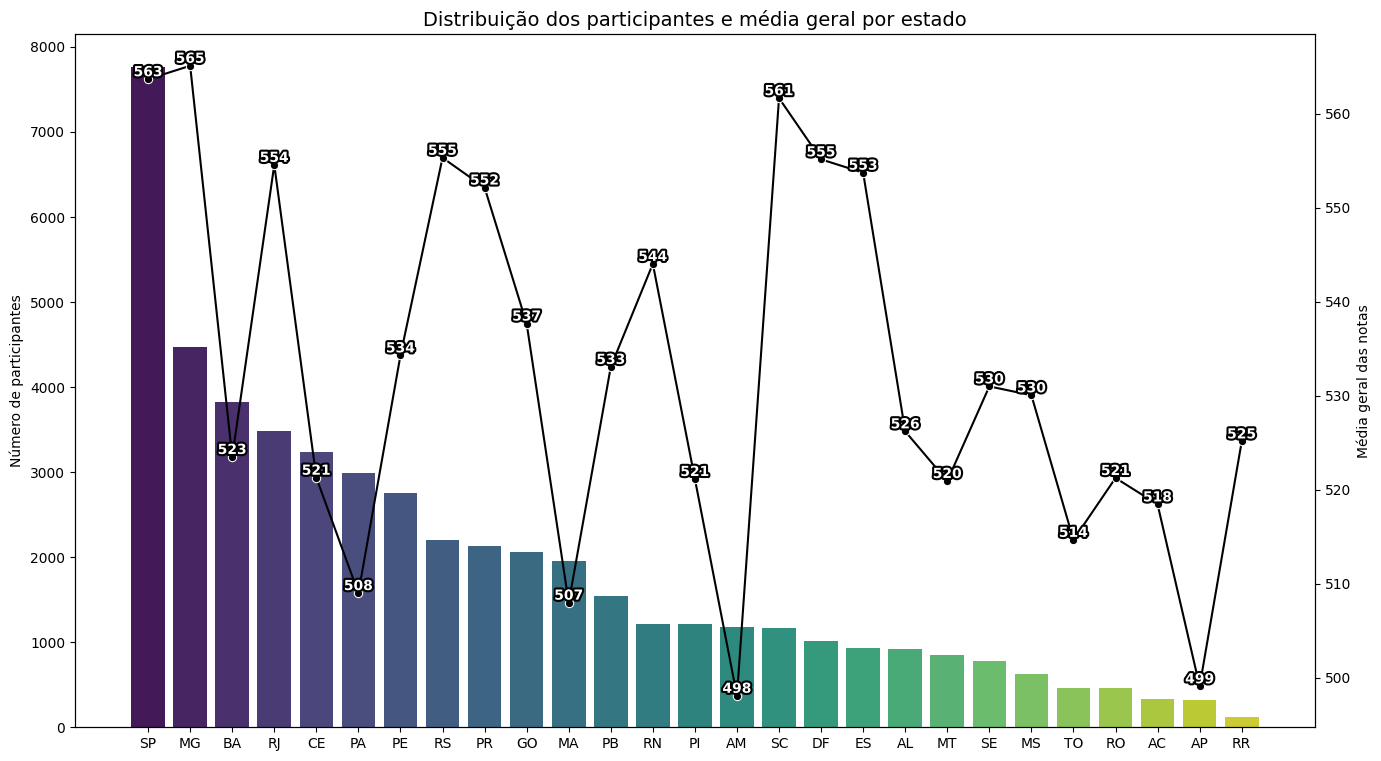

In [6]:
import matplotlib.patheffects as path_effects

# Conta os participantes por estado e ordena pela quantidade
uf_counts = df['SG_UF_PROVA'].value_counts(ascending=False)

# Calcula a média geral por estado
media_geral_uf = df.groupby('SG_UF_PROVA')[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().mean(axis=1)
media_geral_uf = media_geral_uf.loc[uf_counts.index]  # Ordena conforme a quantidade de participantes

# Cria o gráfico
fig, ax1 = plt.subplots(figsize=(16, 9))

# Gráfico de barras para quantidade de participantes
sns.barplot(x=uf_counts.index, y=uf_counts.values, palette='viridis', ax=ax1)
ax1.set_ylabel('Número de participantes', color='black')

# Cria um segundo eixo y para a média das notas
ax2 = ax1.twinx()
sns.lineplot(x=media_geral_uf.index, y=media_geral_uf.values, color='black', marker='o', ax=ax2)
ax2.set_ylabel('Média geral das notas', color='black')

# Adiciona labels
for i, txt in enumerate(media_geral_uf.values):
    text = ax2.text(i, txt, f'{int(txt)}', ha='center', va='bottom', fontsize=10, fontweight='bold',
                    color='white', path_effects=[path_effects.withStroke(linewidth=3, foreground='black')]) # Borda branca e texto preto

# Define o título
plt.title('Distribuição dos participantes e média geral por estado', fontsize=14)
ax1.set_xlabel('')

# Exibe o gráfico
plt.show()

Este gráfico exibe a distribuição dos participantes do ENEM e as médias gerais por estado.

**Quanto à quantidade de participantes:**
+ **São Paulo lidera com folga** - o estado de São Paulo (SP) tem disparadamente o maior número de participantes, refletindo sua maior população.

+ **Outros estados com alta participação** - Minas Gerais (MG), Rio de Janeiro (RJ) e Ceará (CE) também apresentam grande número de candidatos, o que faz sentido considerando suas populações e políticas educacionais.

+ **Estados do Norte e Centro-Oeste com menos inscritos** - estados como Roraima (RR), Amapá (AP), Acre (AC) e Tocantins (TO) têm um número significativamente menor de participantes, o que pode estar relacionado à menor densidade populacional e menos infraestrutura educacional.

+ **Distribuição segue o tamanho da população** - a tendência geral do gráfico reflete a demografia brasileira, onde os estados mais populosos possuem mais participantes.

**Quanto às notas por estado:**
+ **Sul e sudeste lideram** - estados dessas regiões apresentam médias mais altas, refletindo maior acesso a escolas privadas, melhor infraestrutura e ensino de maior qualidade.

+ **Centro-Oeste com desempenho mediano** - a região apresenta médias relativamente altas, com destaque para o Distrito Federal, e médias relativamente baixas, como a de Mato Grosso.

+ **Nordeste e Norte têm médias mais baixas** - a média geral tende a ser inferior nessas regiões, possivelmente devido a desigualdades educacionais e menor acesso a recursos. Há uma maior dependência do ensino público, que pode ter mais dificuldades estruturais.

### **Distribuição de notas por prova**

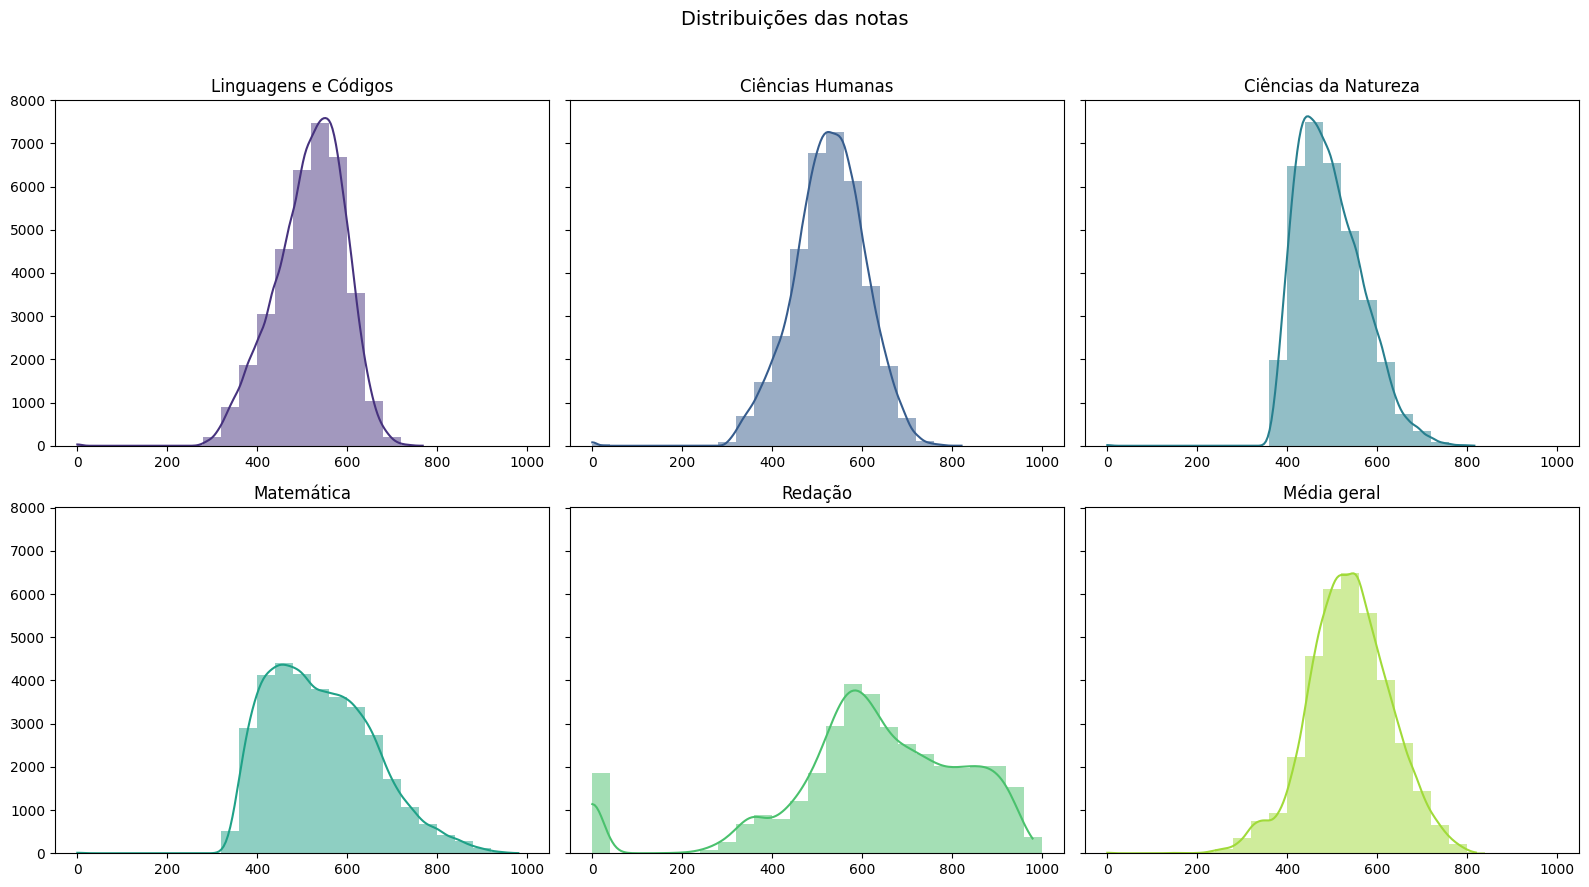

In [7]:
# Define as colunas das notas
colunas_notas = [
    'NU_NOTA_LC',      # Linguagens
    'NU_NOTA_CH',      # Ciências Humanas
    'NU_NOTA_CN',      # Ciências da Natureza
    'NU_NOTA_MT',      # Matemática
    'NU_NOTA_REDACAO', # Redação
]

# Calcula a média final sem peso
df['NU_MEDIA_GERAL'] = df[colunas_notas].mean(axis=1, skipna=True)
colunas_notas.append('NU_MEDIA_GERAL')

# Define os títulos dos subplots
titulos = ['Linguagens e Códigos', 'Ciências Humanas', 'Ciências da Natureza', 'Matemática', 'Redação', 'Média geral']

# Cria os subplots compartilhando os eixos y
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharey=True)
fig.suptitle('Distribuições das notas', fontsize=14)

# Cores
cores = sns.color_palette('viridis', len(colunas_notas))

# Define a largura fixa das barras
bin_width = 40
bin_edges = range(0, 1001, bin_width)

# Gera os histogramas
for ax, col, titulo, cor in zip(axes.flat, colunas_notas, titulos, cores):
    sns.histplot(df[col].dropna(), bins=bin_edges, ax=ax, kde=True, color=cor, edgecolor=None)
    ax.set_title(titulo, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajusta o layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Os histogramas mostram a distribuição das notas em cada prova, revelando padrões importantes:
#
+ Linguagens, Ciências Humanas, Ciências da Natureza e Média Geral - distribuição aproximadamente normal, com a maioria entre 400 e 700 pontos.

+ Matemática - assimetria à direita, indicando que é mais fácil tirar notas altas. Maior concentração entre 400 e 600, mas com boa quantidade acima de 800 pontos.

+ Redação - distribuição bimodal, com picos em 600 e 0. O pico em 0 indica candidatos que zeraram a prova, algo que não é incomum no exame.

### **Diferença entre a rede pública e escolas privadas**

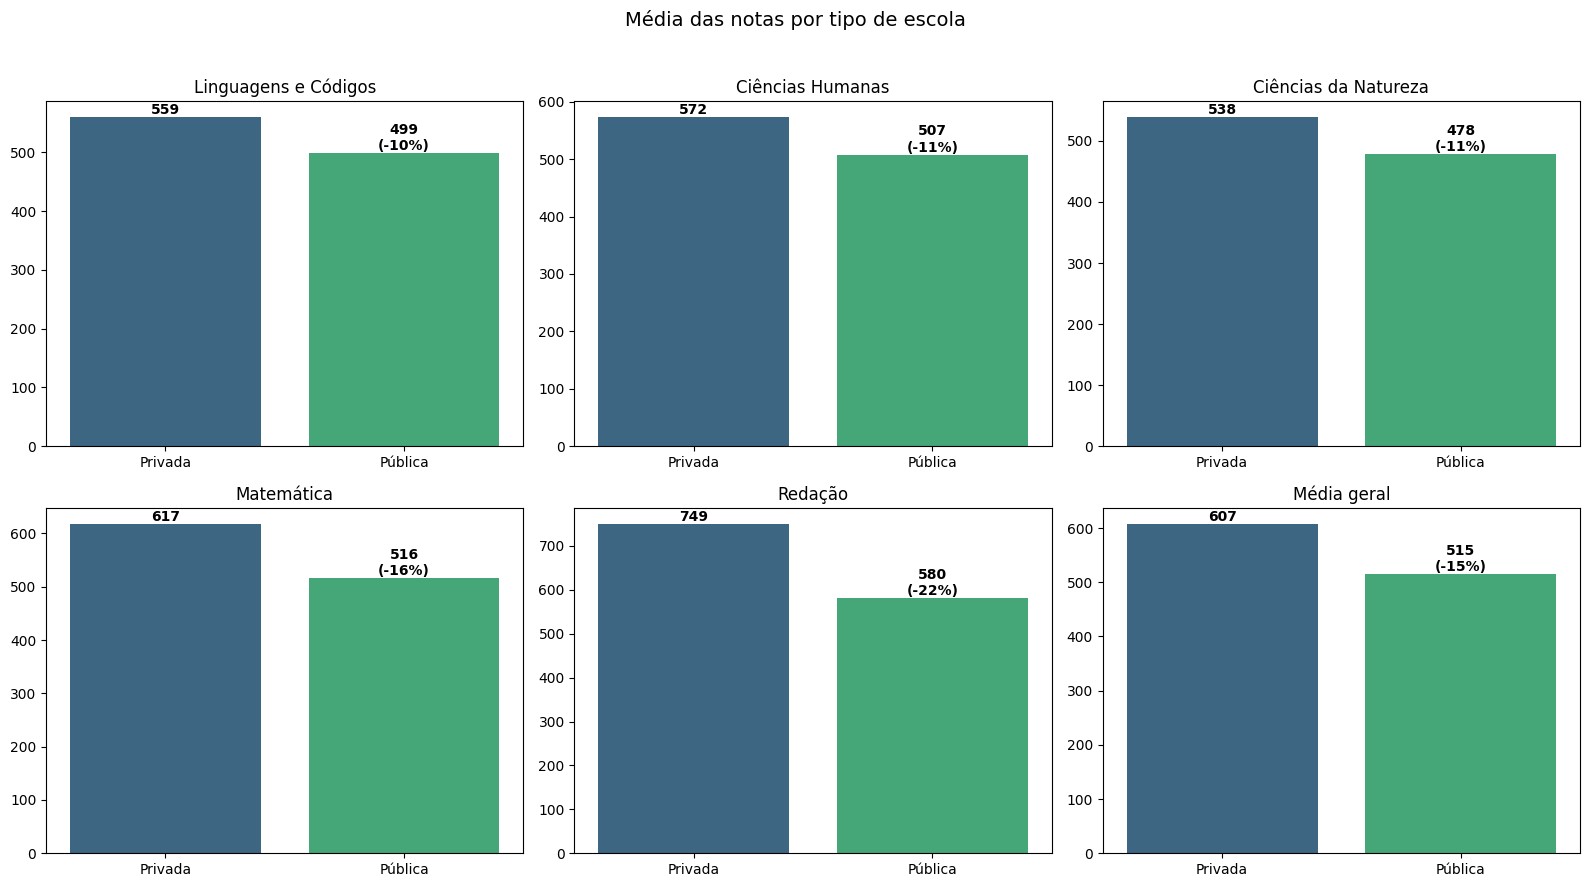

In [8]:
# Cria os subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Média das notas por tipo de escola', fontsize=14)

# Cores
cores = sns.color_palette('viridis', 2)

# Gera os gráficos de barras
for ax, col, titulo in zip(axes.flat, colunas_notas, titulos):
    medias = df[df['TP_ESCOLA'] != 'Não Respondeu'].groupby('TP_ESCOLA')[col].mean().dropna()
    if not medias.empty:
        bars = sns.barplot(x=medias.index, y=medias.values, ax=ax, palette=cores)
        privada = medias.get('Privada', 0)
        publica = medias.get('Pública', 0)
        
        for bar in bars.patches:
            valor = int(bar.get_height())
            label = f'{valor}'
            
            # Adiciona a diferença percentual na barra da escola pública
            if bar.get_x() > 0.5 and privada > 0:
                diferenca = ((privada - publica) / privada) * 100
                label = f'{valor}\n(-{int(diferenca)}%)'
            
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(), # Posição Y no topo da barra
                label,
                ha='center', va='bottom', fontsize=10, fontweight='bold'
            )
    
    ax.set_title(titulo, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajusta o layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Este conjunto de gráficos compara as médias das notas entre estudantes de escolas públicas e privadas no ENEM 2022, com destaque para a diferença percentual na escola pública.
#
+ **Desempenho consistentemente superior nas escolas privadas**
    + Em todas as provas, candidatos de escolas privadas tiveram médias superiores em relação aos de escolas públicas.
    + A maior diferença ocorre na redação (-22%), enquanto a menor diferença aparece em ciências humanas (-11%).

+ **Matemática e redação mostram as maiores disparidades**

+ **Ciências da natureza, linguagens e códigos e ciências humanas têm diferenças menores**

+ **Média geral reflete o padrão**
  + **Privada:** 607  
  + **Pública:** 515 (-15%)  
#
O desempenho superior de candidatos da escola privada reflete fatores como melhor estrutura, maior tempo de preparação e ensino direcionado para o ENEM.
A maior disparidade na redação pode indicar dificuldades na escrita e interpretação de texto em estudantes da rede pública.

### **Correlação entre desempenho em Linguagens e Códigos e Redação**

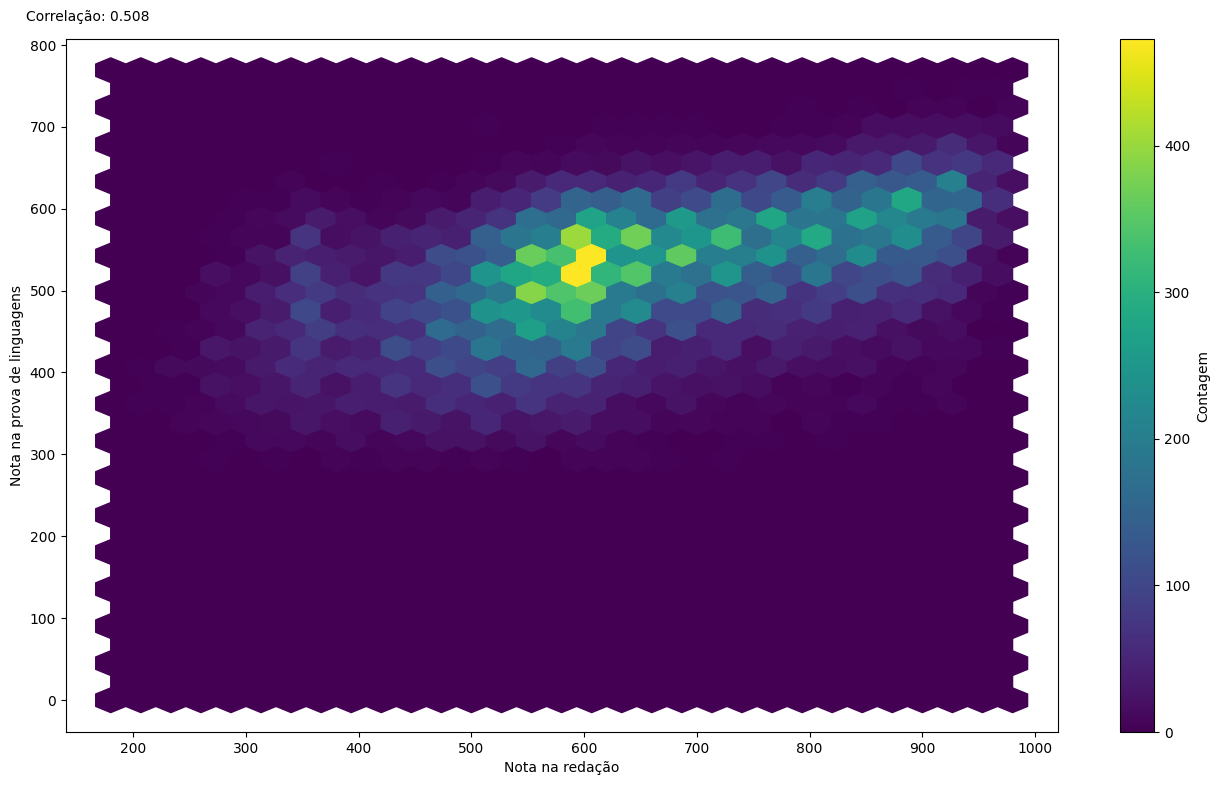

In [9]:
# Função para remover outliers
def lims(df, var):
    iqr = np.quantile(df[var], 0.75) - np.quantile(df[var], 0.25)
    lim_inf = np.quantile(df[var], 0.25) - 1.5 * iqr
    lim_sup = np.quantile(df[var], 0.75) + 1.5 * iqr
    return df[(df[var] > lim_inf) & (df[var] < lim_sup)]

# Filtra valores válidos e remove outliers na redação
subset = df[['NU_NOTA_REDACAO', 'NU_NOTA_LC']].dropna()
subset = lims(subset, 'NU_NOTA_REDACAO')

# Calcula a correlação
correlacao = np.corrcoef(subset['NU_NOTA_REDACAO'], subset['NU_NOTA_LC'])[0, 1]

# Cria o hexbin plot
fig, ax = plt.subplots(figsize=(16, 9))
hb = ax.hexbin(subset['NU_NOTA_REDACAO'], subset['NU_NOTA_LC'], gridsize=30, cmap='viridis')

# Define rótulos e exibe a correlação
ax.set_xlabel('Nota na redação')
ax.set_ylabel('Nota na prova de linguagens')
plt.colorbar(hb, label='Contagem')
plt.figtext(0.1, 0.9, f'Correlação: {correlacao:.3f}', fontsize=10, color='black')

# Exibe o gráfico
plt.show()

Este gráfico apresenta a correlação entre as notas da redação e Linguagens e Códigos no ENEM 2022.
#
+ **Correlação moderada positiva (0.508)** - a correlação de 0.508 indica que há uma tendência positiva: candidatos que tiram notas altas na Redação tendem a ter notas altas na prova de Linguagens. No entanto, o valor não é perfeitamente linear, o que sugere que outros fatores também influenciam a relação entre essas notas.

+ **Distribuição centralizada** - a maioria dos candidatos tem notas entre 400 e 700 em ambas as provas. As regiões com maior concentração de candidatos aparecem em verde/amarelo, indicando um alto número de participantes nessa faixa.

+ **Presença de notas extremas** - há poucos candidatos com notas muito baixas em ambas as provas. Também existem candidatos com notas altas na redação (~900-1000), mas sem necessariamente obterem notas equivalentes em Linguagens.
#
A prova de Linguagens envolve interpretação e gramática, enquanto a redação avalia escrita e argumentação. Candidatos podem ter dificuldades em apenas uma dessas habilidades, gerando a dispersão observada no gráfico.

## **Estatísticas descritivas** <a id="estatisticas-descritivas"></a>

In [10]:
# Colunas relevantes
colunas_importantes = [
    # Condições socioeconômicas
    'TP_ESCOLA',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_FAIXA_ETARIA', 
    'IN_TREINEIRO', # A informação se o candidato é treineiro pode ser relevante para prever sua nota ou presença em provas
    'SG_UF_PROVA',  # É possível que características regionais influenciem na nota
    'Q005',         # Quantas pessoas moram na mesma casa
    'Q006',         # Renda mensal familiar
    'Q024',         # Possui computador
    'Q025',         # Possui internet

    # É possível usar as variáveis socioeconômicas para prever a nota do candidato. Serão mantidas como possíveis variáveis alvo para o modelo
    'NU_NOTA_LC',
    'NU_NOTA_CH',
    'NU_NOTA_CN',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',

    # Além de prever as notas, é possível usar as informações do dataset para prever se o candidato irá faltar a uma prova. Serão mantidas como possíveis variáveis alvo para o modelo
    'TP_PRESENCA_LC',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_MT'
]

# Exibe informações gerais
display(df[colunas_importantes].info())

# Estatísticas descritivas apenas para as colunas escolhidas
display(df[colunas_importantes].describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TP_ESCOLA        50000 non-null  object 
 1   TP_SEXO          50000 non-null  object 
 2   TP_COR_RACA      50000 non-null  object 
 3   TP_FAIXA_ETARIA  50000 non-null  object 
 4   IN_TREINEIRO     50000 non-null  object 
 5   SG_UF_PROVA      50000 non-null  object 
 6   Q005             50000 non-null  int64  
 7   Q006             50000 non-null  object 
 8   Q024             50000 non-null  object 
 9   Q025             50000 non-null  object 
 10  NU_NOTA_LC       35896 non-null  float64
 11  NU_NOTA_CH       35896 non-null  float64
 12  NU_NOTA_CN       33998 non-null  float64
 13  NU_NOTA_MT       33998 non-null  float64
 14  NU_NOTA_REDACAO  35896 non-null  float64
 15  TP_PRESENCA_LC   50000 non-null  object 
 16  TP_PRESENCA_CH   50000 non-null  object 
 17  TP_PRESENCA_

None

,TP_ESCOLA,TP_SEXO,TP_COR_RACA,TP_FAIXA_ETARIA,IN_TREINEIRO,SG_UF_PROVA,Q005,Q006,Q024,Q025,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_LC,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_MT
count,50000,50000,50000,50000,50000,50000,50000.000000,50000,50000,50000,35896.000000,35896.000000,33998.000000,33998.000000,35896.000000,50000,50000,50000,50000
unique,3,2,6,20,2,27,NaN,17,5,2,NaN,NaN,NaN,NaN,NaN,3,3,3,3
top,Não Respondeu,Feminino,Parda,18 anos,Não,SP,NaN,"Até R$ 1.212,00",Não.,Sim.,NaN,NaN,NaN,NaN,NaN,Presente,Presente,Presente,Presente
freq,30955,30661,21373,11750,42670,7760,NaN,14817,23351,45264,NaN,NaN,NaN,NaN,NaN,35896,35896,33998,33998
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.738400,NaN,NaN,NaN,517.290032,526.896782,495.842955,541.861918,619.330287,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.377056,NaN,NaN,NaN,77.365889,80.567407,72.046299,116.603289,211.501461,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,467.900000,476.800000,440.200000,448.100000,520.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,525.500000,529.400000,485.800000,528.900000,620.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,573.200000,581.100000,542.900000,621.700000,760.000000,NaN,NaN,NaN,NaN


**Informações gerais**
- O dataset tem uma mistura de variáveis categóricas e numéricas.
- Algumas variáveis de notas apresentam valores ausentes (28% dos candidatos faltaram às provas).

**Variáveis acadêmicas**
- TP_ESCOLA: maioria dos candidatos estudou em escolas públicas.
- IN_TREINEIRO: existe um número considerável de treineiros (aproximadamente 15%), ou seja, candidatos que ainda não concluíram o ensino médio.

**Condição socioeconômica**
- Q005 (quantas pessoas moram na mesma residência): em média moram 3,73 pessoas por residência, incluindo o candidato.
- Q006 (faixa de renda familiar): a maioria dos candidatos tem renda mais baixa, o que é consistente com dados de acesso ao ENEM.
- Q024 (possui computador em casa?) e Q025 (possui internet?): ainda há candidatos sem acesso a esses recursos essenciais.

**Notas**
- As notas variam bastante, com distribuição concentrada entre 400 e 700 pontos.
- Matemática tem maior assimetria à direita, indicando mais candidatos com notas altas.
- Redação tem comportamento bimodal, sugerindo um grupo que zerou a prova.

**Presença e status da prova**
- TP_PRESENCA_* (presença nas provas): há um número relevante de candidatos que faltaram a uma ou mais provas.
- TP_STATUS_REDACAO: muitos candidatos tiveram a redação anulada ou zerada.

**Conclusões**
- O dataset tem um alto número de estudantes de baixa renda, reforçando o papel do ENEM no acesso ao ensino superior.
- A distribuição das notas indica que algumas provas, como Matemática, são mais fáceis de pontuar alto do que outras.
- A Redação tem uma distribuição atípica, com candidatos que zeraram e um grupo principal com média em torno de 600 pontos.
- Há uma taxa considerável de faltas.
- Aparentemente **não há outliers** nas colunas de notas, indicando um bom tratamento dos dados.

## **Correlação e encoding** <a id='correlacao'></a>

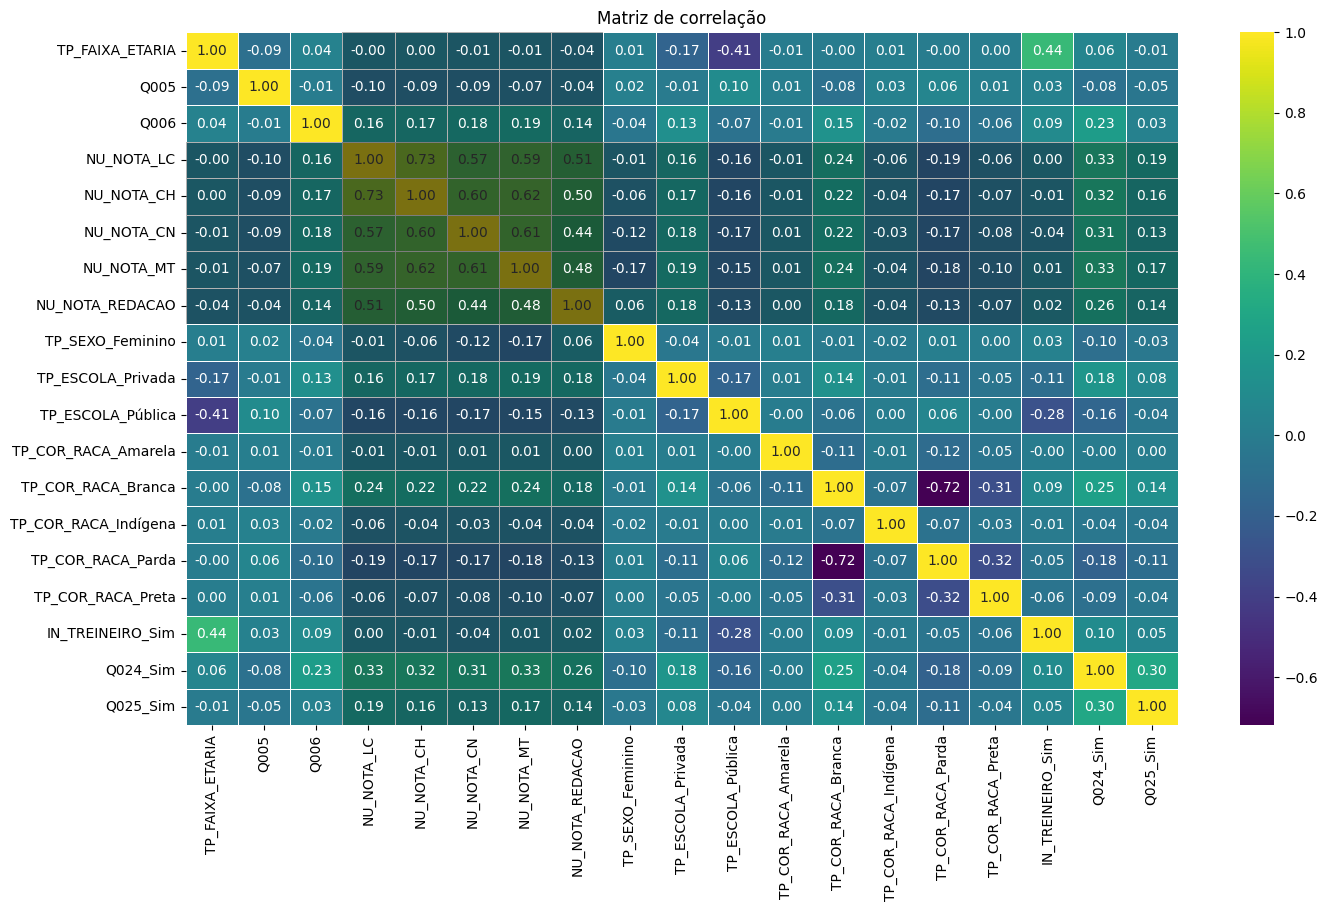

In [11]:
from sklearn.preprocessing import LabelEncoder

# Armazena uma cópia do dataframe original contendo apenas as colunas importantes
df_encoded = df[colunas_importantes].copy()

# Aplica One Hot Encoding em variáveis categóricas sem relação ordinal
colunas_one_hot = ['TP_SEXO', 'TP_ESCOLA', 'TP_COR_RACA', 'IN_TREINEIRO', 'Q024', 'Q025']

# Converte a variável 'Q024' (possui computador) para um formato binário, ignorando a quantidade
df_encoded['Q024'] = df_encoded['Q024'].apply(lambda x: 'Sim' if 'Sim' in x else 'Não')

# Padroniza os valores de 'Q025' removendo pontos extras
df_encoded['Q025'] = df_encoded['Q025'].str.strip('.')

# Gera variáveis dummy
df_encoded = pd.get_dummies(df_encoded, columns=colunas_one_hot, dtype=int)

# Remove categorias que não trazem informações relevantes para análise
colunas_para_remover = [
    'TP_SEXO_Masculino',         # Redundante com o sexo feminino
    'TP_ESCOLA_Não Respondeu',   # Não contribui para interpretação
    'TP_COR_RACA_Não declarado', # Não representa um grupo informativo
    'IN_TREINEIRO_Não',          # A presença da variável 'IN_TREINEIRO_Sim' já traz a informação necessária
    'Q024_Não',                  # Redundante, já que a ausência de 'Sim' implica 'Não'
    'Q025_Não'                   # Redundante, já que a ausência de 'Sim' implica 'Não'
]

# Remove apenas as colunas que realmente existem no dataframe
df_encoded.drop(columns=[col for col in colunas_para_remover if col in df_encoded.columns], inplace=True)

# Aplica Label Encoding em variáveis ordinais garantindo a ordem correta
colunas_label = ['TP_FAIXA_ETARIA', 'Q006']
ordens = {'TP_FAIXA_ETARIA': np.array(ordem_idades), 'Q006': np.array(ordem_renda_corrigida)}

for col in colunas_label:
    encoder = LabelEncoder()
    encoder.fit(ordens[col])  # Ajusta o encoder com a ordem correta
    df_encoded[col] = encoder.transform(df_encoded[col])

# Remove a coluna de UF, pois aumentaria muito a dimensionalidade da matriz sem um critério claro para ordenação
df_encoded.drop(columns=['SG_UF_PROVA'], inplace=True)

# Calcula a matriz de correlação entre as variáveis numéricas e as categorias convertidas
correlation_matrix = df_encoded.corr()

# Define as colunas correspondentes às notas
colunas_notas = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Gera um heatmap para visualizar a correlação entre as variáveis
plt.figure(figsize=(16, 9))
ax = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5)

# Obtém os índices das colunas correspondentes às notas
indices_notas = [correlation_matrix.columns.get_loc(col) for col in colunas_notas]

# Destaca as áreas das notas desenhando um retângulo semi-transparente para facilitar a visualização
for idx in indices_notas:
    ax.add_patch(plt.Rectangle((idx, 0), 1, len(correlation_matrix), fill=True, color='black', alpha=0.3, lw=0))
    ax.add_patch(plt.Rectangle((0, idx), len(correlation_matrix), 1, fill=True, color='black', alpha=0.3, lw=0))

plt.title('Matriz de correlação')
plt.show()

+ Notas das provas possuem alta correlação entre si, **especialmente entre Ciências Humanas e Linguagens**.

+ Renda familiar está positivamente correlacionada com todas as notas, indicando que **candidatos de famílias com maior renda tendem a ter desempenho superior**.

+ **Alunos de escolas privadas têm notas mais altas**, enquanto alunos de escolas públicas apresentam tendência oposta.

+ **Candidatos brancos tendem a ter notas mais altas**, enquanto candidatos pardos e pretos apresentam correlações negativas com as notas.

+ Possuir computador e internet está positivamente relacionado ao desempenho, sugerindo que **acesso à tecnologia pode influenciar nas notas**.

In [12]:
# Salva o dataframe encodado para a etapa seguinte (feature engineering)
df_encoded.to_csv('../data/df_encoded.csv', sep=';', encoding='iso-8859-1', index=False)